In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import datetime

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Survey figures

In [2]:
data_raw = pd.read_csv('analysis/analysis_data.csv')
data = data_raw.copy()
print(data.shape)
data.head()

(250, 93)


,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,duration,Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q_RecaptchaScore,Q2.1_Id,Q2.1_Name,Q2.1_Size,Q2.1_Type,prolific_id,dt_q1,dt_q2,understood_system_did_well_dt,system_confusing_complicated_dt,system_confusing_confusing_dt,understood_system_easy_to_understand_dt,system_confusing_hard_to_remember_dt,understood_system_predictable_dt,understood_system_how_it_works_dt,understood_system_inputs_and_outputs_dt,lr_q1,lr_q2,understood_system_did_well_lr,system_confusing_complicated_lr,system_confusing_confusing_lr,understood_system_easy_to_understand_lr,system_confusing_hard_to_remember_lr,understood_system_predictable_lr,understood_system_how_it_works_lr,understood_system_inputs_and_outputs_lr,bb_no_shap_q1,bb_no_shap_q2,understood_system_did_well_bb_no_shap,system_confusing_complicated_bb_no_shap,system_confusing_confusing_bb_no_shap,understood_system_easy_to_understand_bb_no_shap,system_confusing_hard_to_remember_bb_no_shap,understood_system_predictable_bb_no_shap,understood_system_how_it_works_bb_no_shap,understood_system_inputs_and_outputs_bb_no_shap,bb_shap_q1,bb_shap_q2,understood_system_did_well_bb_shap,system_confusing_complicated_bb_shap,system_confusing_confusing_bb_shap,understood_system_easy_to_understand_bb_shap,system_confusing_hard_to_remember_bb_shap,understood_system_predictable_bb_shap,understood_system_how_it_works_bb_shap,understood_system_inputs_and_outputs_bb_shap,Q9.1,Q9.2,Q9.3_1,Q9.3_2,Q9.3_3,Q9.3_4,Q9.4,PROLIFIC_PID,dataset_name,bb_profile_1,bb_profile_2,int_profile_1,int_profile_2,first_model,bb_model,int_model,taken_in_appropiate_time_window,int_q1_correct_answer,int_q2_correct_answer,bb_q1_correct_answer,bb_q2_correct_answer,q1_is_correct_int,q1_is_correct_bb,q2_is_correct_int,q2_is_correct_bb,understood_system_bb,understood_system_int,system_confusing_bb,system_confusing_int
0,0,2021-08-23 22:54:23,2021-08-23 23:00:14,IP Address,104.35.20.232,100,351,True,2021-08-23 23:00:15,R_yqnE1JHcvGdFz7H,NaN,NaN,NaN,NaN,33.929993,-117.947701,anonymous,EN,1.0,F_z6iKgOtuJxyuhMZ,signature.png,14093,image/png,6102d3c05c31cb5c38158b34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,First year grade,5.0,5.0,4.0,2.0,2.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,First year grade,5.0,5.0,5.0,2.0,4.0,4.0,4.0,4.0,8.0,Not knowledgeable at all,No,No,Yes,No,No,6102d3c05c31cb5c38158b34,education,2,4,1,4,int,shap,lr,True,Fail,First year grade,Pass,First year grade,True,True,True,True,3.8,3.8,4.666667,3.666667
1,1,2021-08-23 23:24:31,2021-08-23 23:31:44,IP Address,47.147.135.146,100,433,True,2021-08-23 23:31:45,R_2sErBZc7mlGv79v,NaN,NaN,NaN,NaN,33.790298,-118.121498,anonymous,EN,1.0,F_1P8lvw788zdBWFh,signature.png,14986,image/png,610b88a14eed14f2b8b17b86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Number of absences,2.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,Fail,First year grade,4.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,Not knowledgeable at all,No,No,No,No,No,610b88a14eed14f2b8b17b86,education,1,3,4,1,bb,no_shap,lr,True,Pass,First year grade,Fail,First year grade,True,True,False,True,4.0,2.4,2.666667,4.000000
2,2,2021-08-23 23:55:52,2021-08-24 00:01:24,IP Address,68.172.164.31,100,332,True,2021-08-24 00:01:26,R_BEeWM93HGxSRK8N,NaN,NaN,NaN,NaN,43.212296,-77.699501,anonymous,EN,0.9,F_1cTaUoQcmSH3xbZ,signature.png,12886,image/png,610c24152939c927ad421fa9,Pass,First year grade,4.0,2.0,1.0,5.0,4.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,First year grade,4.0,1.0,1.0,5.0,2.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Slightly knowledgeable,No,No,Yes,No,No,610c24152939c927ad421fa9,education,3,2,4,3,int,no_shap,dt,True,Pass,First year grade,Fail,First year grade,True,True,True,True,4.6,4.4,1.333333,2.333333
3,3,2021-08-24 00:12:19,2021-08-24 00:21:13,IP Address,24.165.25.108,100,534,True,2021-08-

In [49]:
def convert_to_photoshoot_names(x):
    if x == 'lr':
        return "Linear Regression"
    if x == 'dt':
        return "Decision Tree"
    if x == 'no_shap':
        return "Black-box model"
    if x == 'shap':
        return "Black-box model (with SHAP)"
    if x == 'education':
        return "Education"
    if x == 'housing':
        return "Housing"

In [69]:
temp1 = data.filter(items=['dataset_name','int_model','understood_system_int']).rename(columns={'int_model':'model',
                                                                             'understood_system_int':'understood_system'})
temp2 = data.filter(items=['dataset_name','bb_model','understood_system_bb']).rename(columns={'bb_model':'model',
                                                                           'understood_system_bb':'understood_system'})
temp = temp1.append(temp2)
temp['model'] = temp['model'].apply(convert_to_photoshoot_names)
temp['dataset_name'] = temp['dataset_name'].apply(convert_to_photoshoot_names)
Understood_System_Data = temp.rename(columns={'dataset_name': "Domain",
                                              'model': "Model",
                                              'understood_system': "Understood System"})

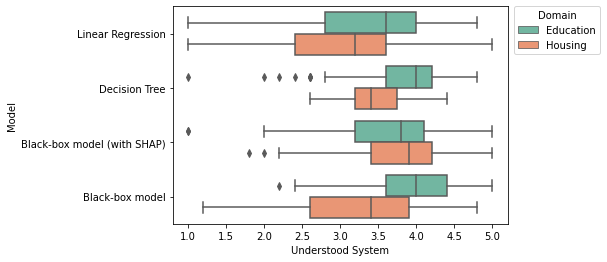

In [51]:
ax = sns.boxplot(x="Understood System", y="Model", hue="Domain", data=Understood_System_Data, orient="h", palette="Set2")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Domain")

In [52]:
temp1 = data.filter(items=['dataset_name','int_model','system_confusing_int']).rename(columns={'int_model':'model',
                                                                                               'system_confusing_int':'system_confusing'})
temp2 = data.filter(items=['dataset_name','bb_model','system_confusing_bb']).rename(columns={'bb_model':'model',
                                                                                             'system_confusing_bb':'system_confusing'})
temp = temp1.append(temp2)
temp['model'] = temp['model'].apply(convert_to_photoshoot_names)
temp['dataset_name'] = temp['dataset_name'].apply(convert_to_photoshoot_names)
System_Confusing_Data = temp.rename(columns={'dataset_name': "Domain",
                                              'model': "Model",
                                              'system_confusing': "System Confusing"})

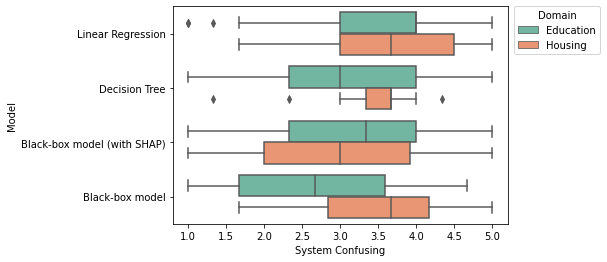

In [53]:
ax = sns.boxplot(x="System Confusing", y="Model", hue="Domain", data=System_Confusing_Data, orient="h", palette="Set2")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Domain")

In [54]:
edu_data = data[data['dataset_name']=="education"]
hous_data = data[data['dataset_name']=="housing"]
means = [['Education','dt', edu_data[edu_data['int_model']=='dt'].q1_is_correct_int.mean()],
         ['Education','lr', edu_data[edu_data['int_model']=='lr'].q1_is_correct_int.mean()],
         ['Education','shap', edu_data[edu_data['bb_model']=='shap'].q1_is_correct_bb.mean()],
         ['Education','no_shap', edu_data[edu_data['bb_model']=='no_shap'].q1_is_correct_bb.mean()],
         ['Housing','dt', hous_data[hous_data['int_model']=='dt'].q1_is_correct_int.mean()],
         ['Housing','lr', hous_data[hous_data['int_model']=='lr'].q1_is_correct_int.mean()],
         ['Housing','shap', hous_data[hous_data['bb_model']=='shap'].q1_is_correct_bb.mean()],
         ['Housing','no_shap', hous_data[hous_data['bb_model']=='no_shap'].q1_is_correct_bb.mean()]]
    
Task_1_Performance_Data = pd.DataFrame(means, columns =['Domain','Model', 'Task 1 Performance (% correct)'])
Task_1_Performance_Data['Model'] = Task_1_Performance_Data['Model'].apply(convert_to_photoshoot_names)

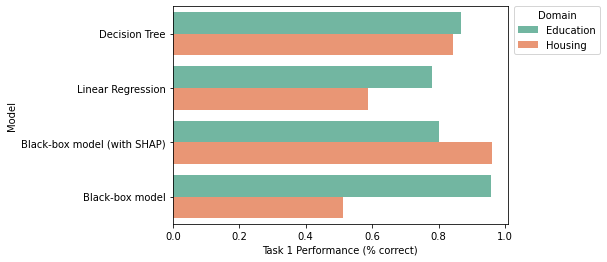

In [55]:
ax = sns.barplot(x="Task 1 Performance (% correct)", y="Model", hue="Domain",data=Task_1_Performance_Data, orient="h", palette="Set2")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Domain")

In [56]:
means2 = [['Education','dt', edu_data[edu_data['int_model']=='dt'].q2_is_correct_int.mean()],
         ['Education','lr', edu_data[edu_data['int_model']=='lr'].q2_is_correct_int.mean()],
         ['Education','shap', edu_data[edu_data['bb_model']=='shap'].q2_is_correct_bb.mean()],
         ['Education','no_shap', edu_data[edu_data['bb_model']=='no_shap'].q2_is_correct_bb.mean()],
         ['Housing','dt', hous_data[hous_data['int_model']=='dt'].q2_is_correct_int.mean()],
         ['Housing','lr', hous_data[hous_data['int_model']=='lr'].q2_is_correct_int.mean()],
         ['Housing','shap', hous_data[hous_data['bb_model']=='shap'].q2_is_correct_bb.mean()],
         ['Housing','no_shap', hous_data[hous_data['bb_model']=='no_shap'].q2_is_correct_bb.mean()]]
    
Task_2_Performance_Data = pd.DataFrame(means2, columns =['Domain','Model', 'Task 2 Performance (% correct)'])
Task_2_Performance_Data['Model'] = Task_2_Performance_Data['Model'].apply(convert_to_photoshoot_names)

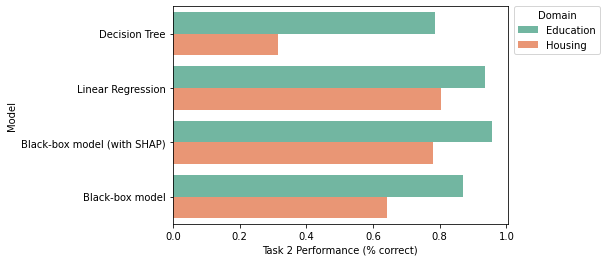

In [57]:
ax = sns.barplot(x="Task 2 Performance (% correct)", y="Model", hue="Domain",data=Task_2_Performance_Data, orient="h", palette="Set2")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Domain")

# Model performance figures

In [20]:
model_results_education_raw = pd.read_csv('analysis/best_models_education.csv')
model_results_education = model_results_education_raw.copy()
model_results_education = model_results_education[0:56]
print(model_results_education.shape)
model_results_education.head(100)

(56, 5)


,dataset_name,model_type,metric_name,metric_k,best_score
0,education,XGB,accuracy_score,NaN,0.8870
1,education,LR,accuracy_score,NaN,0.8806
2,education,LRR,accuracy_score,NaN,0.8710
3,education,RF,accuracy_score,NaN,0.8710
4,education,LRL,accuracy_score,NaN,0.8697
5,education,ET,accuracy_score,NaN,0.8464
6,education,DT,accuracy_score,NaN,0.8202
7,education,DC,accuracy_score,NaN,0.7797
8,education,XGB,f1_score,NaN,0.7332
9,education,LR,f1_score,NaN,0.7155


In [21]:
model_results_housing_raw = pd.read_csv('analysis/best_models_housing.csv')
model_results_housing = model_results_housing_raw.copy()
model_results_housing = model_results_housing[0:56]
print(model_results_housing.shape)
model_results_housing.head()

(56, 5)


,dataset_name,model_type,metric_name,metric_k,best_score
0,housing,RF,accuracy_score,NaN,0.8899
1,housing,XGB,accuracy_score,NaN,0.8895
2,housing,ET,accuracy_score,NaN,0.8851
3,housing,LR,accuracy_score,NaN,0.8768
4,housing,LRR,accuracy_score,NaN,0.8720


In [22]:
model_results = model_results_education.append(model_results_housing)
print(model_results.shape)

(112, 5)


In [46]:
xgb_best_accuracy_education = model_results_education[(model_results_education.model_type=='XGB') & (model_results_education.metric_name=='accuracy_score')]['best_score'].iloc[0]
dt_best_accuracy_education = model_results_education[(model_results_education.model_type=='DT') & (model_results_education.metric_name=='accuracy_score')]['best_score'].iloc[0]
lrl_best_accuracy_education = model_results_education[(model_results_education.model_type=='LRL') & (model_results_education.metric_name=='accuracy_score')]['best_score'].iloc[0]
xgb_best_precision25_education = model_results_education[(model_results_education.model_type=='XGB') & (model_results_education.metric_name=='precision_score') & (model_results_education.metric_k == 25)]['best_score'].iloc[0]
dt_best_precision25_education = model_results_education[(model_results_education.model_type=='DT') & (model_results_education.metric_name=='precision_score') & (model_results_education.metric_k == 25)]['best_score'].iloc[0]
lrl_best_precision25_education = model_results_education[(model_results_education.model_type=='LRL') & (model_results_education.metric_name=='precision_score') & (model_results_education.metric_k == 25)]['best_score'].iloc[0]

In [59]:
xgb_best_accuracy_housing = model_results_housing[(model_results_housing.model_type=='XGB') & (model_results_housing.metric_name=='accuracy_score')]['best_score'].iloc[0]
dt_best_accuracy_housing = model_results_housing[(model_results_housing.model_type=='DT') & (model_results_housing.metric_name=='accuracy_score')]['best_score'].iloc[0]
lrl_best_accuracy_housing = model_results_housing[(model_results_housing.model_type=='LRL') & (model_results_housing.metric_name=='accuracy_score')]['best_score'].iloc[0]
xgb_best_precision25_housing = model_results_housing[(model_results_housing.model_type=='XGB') & (model_results_housing.metric_name=='precision_score') & (model_results_housing.metric_k == 25)]['best_score'].iloc[0]
dt_best_precision25_housing = model_results_housing[(model_results_housing.model_type=='DT') & (model_results_housing.metric_name=='precision_score') & (model_results_housing.metric_k == 25)]['best_score'].iloc[0]
lrl_best_precision25_housing = model_results_housing[(model_results_housing.model_type=='LRL') & (model_results_housing.metric_name=='precision_score') & (model_results_housing.metric_k == 25)]['best_score'].iloc[0]

Understood System
Domain    Model                                         
Education Black-box model                       3.991429
          Black-box model (with SHAP)           3.591209
          Decision Tree                         3.797619
          Linear Regression                     3.475325
Housing   Black-box model                       3.230769
          Black-box model (with SHAP)           3.756000
          Decision Tree                         3.484211
          Linear Regression                     3.096000

In [95]:
table = [['Education','Decision Tree', dt_best_accuracy_education, dt_best_precision25_education],
         ['Education','Linear Regression', lrl_best_accuracy_education, lrl_best_precision25_education],
         ['Education','Black-box model (with SHAP)', xgb_best_accuracy_education, xgb_best_precision25_education],
         ['Education','Black-box model', xgb_best_accuracy_education, xgb_best_precision25_education],
         ['Housing','Decision Tree', dt_best_accuracy_housing, dt_best_precision25_housing],
         ['Housing','Linear Regression', lrl_best_accuracy_housing, lrl_best_precision25_housing],
         ['Housing','Black-box model (with SHAP)', xgb_best_accuracy_housing, xgb_best_precision25_housing],
         ['Housing','Black-box model', xgb_best_accuracy_housing, xgb_best_precision25_housing]]

Model_Performance_Data = pd.DataFrame(table, columns =['Domain','Model', 'Best Accuracy Score', 'Best Precision@25%'])
Model_Performance_Data = pd.merge(Model_Performance_Data,Understood_System_Data.groupby(by=['Domain','Model']).mean(),on=['Domain','Model'],how='left')
Model_Performance_Data = pd.merge(Model_Performance_Data,System_Confusing_Data.groupby(by=['Domain','Model']).mean(),on=['Domain','Model'],how='left')
Model_Performance_Data = pd.merge(Model_Performance_Data,Task_1_Performance_Data,on=['Domain','Model'],how='left')
Model_Performance_Data = pd.merge(Model_Performance_Data,Task_2_Performance_Data,on=['Domain','Model'],how='left')
Model_Performance_Data.head(10)

,Domain,Model,Best Accuracy Score,Best Precision@25%,Understood System,System Confusing,Task 1 Performance (% correct),Task 2 Performance (% correct)
0,Education,Decision Tree,0.8202,0.5784,3.797619,3.020080,0.869048,0.785714
1,Education,Linear Regression,0.8697,0.6994,3.475325,3.476190,0.779221,0.935065
2,Education,Black-box model (with SHAP),0.8870,0.7711,3.591209,3.230769,0.802198,0.956044
3,Education,Black-box model,0.8870,0.7711,3.991429,2.614286,0.957143,0.871429
4,Housing,Decision Tree,0.8610,0.7840,3.484211,3.517544,0.842105,0.315789
5,Housing,Linear Regression,0.8715,0.7413,3.096000,3.732026,0.588235,0.803922
6,Housing,Black-box model (with SHAP),0.8895,0.8530,3.756000,2.900000,0.960000,0.780000
7,Housing,Black-box model,0.8895,0.8530,3.230769,3.529915,0.512821,0.641026


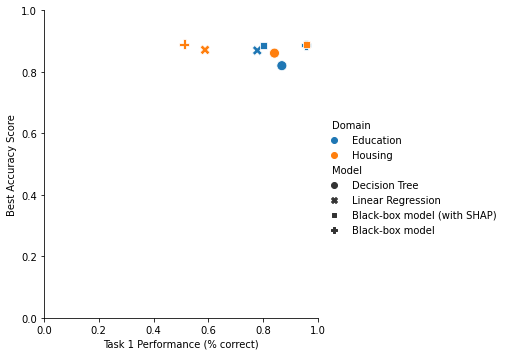

In [101]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Task 1 Performance (% correct)", y="Best Accuracy Score", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

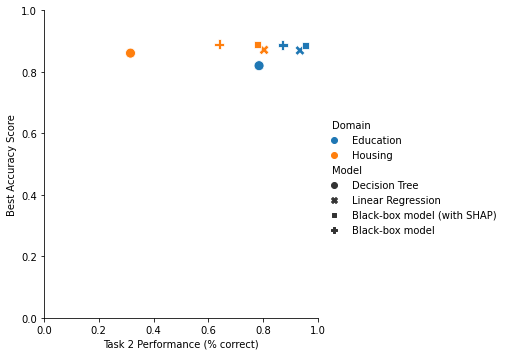

In [102]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Task 2 Performance (% correct)", y="Best Accuracy Score", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

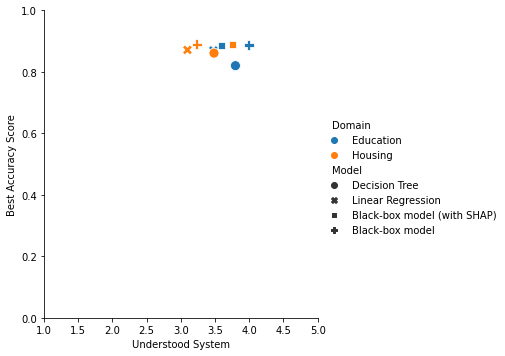

In [103]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Understood System", y="Best Accuracy Score", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(1, 5))

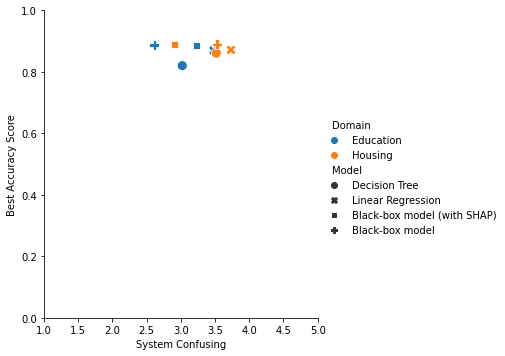

In [104]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="System Confusing", y="Best Accuracy Score", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(1, 5))

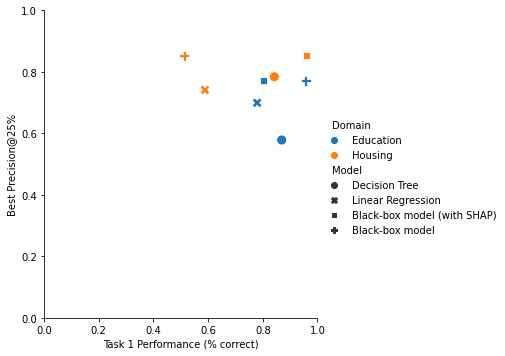

In [105]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Task 1 Performance (% correct)", y="Best Precision@25%", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

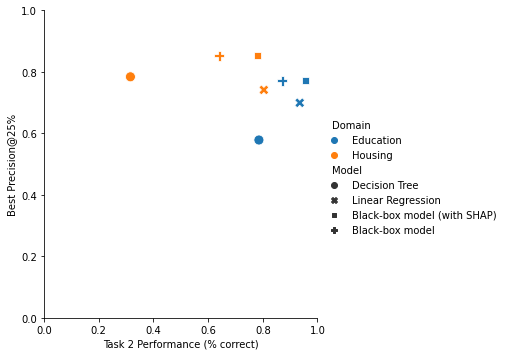

In [106]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Task 2 Performance (% correct)", y="Best Precision@25%", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(0, 1))

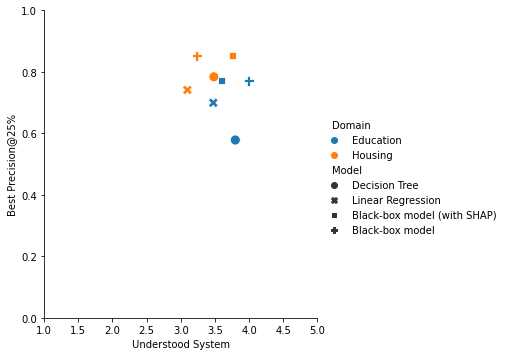

In [110]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="Understood System", y="Best Precision@25%", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(1, 5))

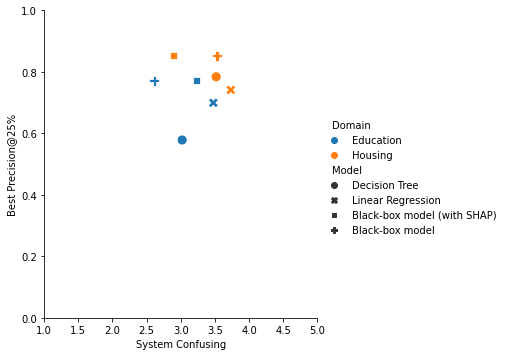

In [111]:
ax = sns.relplot(data=Model_Performance_Data, s=100, x="System Confusing", y="Best Precision@25%", style="Model", hue="Domain", kind="scatter")
ax.set(ylim=(0, 1))
ax.set(xlim=(1, 5))